In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import analysis
import lmpsetup
import hmdsetup

import numpy as np
import matplotlib.pyplot as plt
import analysis

import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis.analysis as mda
from matplotlib.lines import Line2D

## Summary


**[1. RPA Testing](#1)**

**[2. HOOMD Testing](#2)**

### 1. Phosphorilation Epsilon Space Exploration <a id='1'></a>

In [5]:
import fgRPA
ddx = fgRPA.fgRPA(phi_m=0.05)

In [21]:
phis = np.linspace(0.001,0.07,40)
dff = []
ff = []
for phi in phis:
    dff.append(fgRPA.fgRPA(phi_m=phi).df())
    ff.append(fgRPA.fgRPA(phi_m=phi).f())    

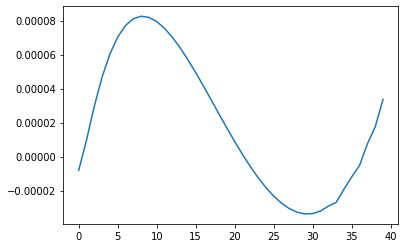

In [32]:
fft = ff+1.23465*phis

plt.plot(ff+1.23465*phis)

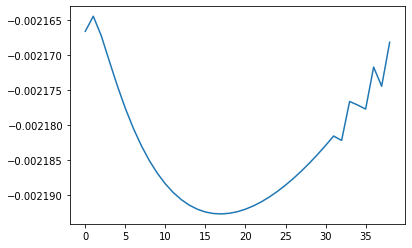

In [36]:
plt.plot((ff-np.roll(ff,1))[1:])

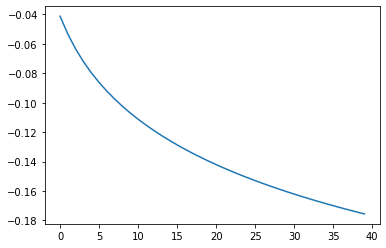

In [37]:
plt.plot(dff)

### 2. Phosphorilation Epsilon Space Exploration <a id='2'></a>